In [181]:
# Libraries import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline


In [184]:
## Data Import
dt = pd.read_csv("https://www.dropbox.com/s/swwrh1zk2av3qy7/cleaned_submisson.csv?dl=1")
dt = dt.drop(['Unnamed: 0'],axis=1)
dt = dt.drop_duplicates(subset = 'reviewid', keep='first')

In [185]:
dt.head(5)

,number,name,reviewid,reviewlink,description,price,appellation,points,pagenum,year,age,country,country_agg
0,1.0,Michele Chiarlo 2010 Cerequio Riserva (Barolo),299972,https://www.winemag.com/buying-guide/michele-c...,"From the stellar 2010 vintage, this gorgeous w...",175.0,Piedmont,98.0,1,2010.0,8.0,Italy,Italy
1,4.0,Massolino 2012 Vigna Rionda (Barolo),298878,https://www.winemag.com/buying-guide/massolino...,"Underbrush, new leather, forest berry, dark sp...",150.0,Piedmont,98.0,1,2012.0,6.0,Italy,Italy
2,5.0,Domaine Zind-Humbrecht 2016 Rangen de Thann Cl...,299917,https://www.winemag.com/buying-guide/domaine-z...,"An intriguing nose combines smoke, flint, crus...",120.0,Alsace,97.0,1,2016.0,2.0,France,France
3,6.0,Josmeyer 2015 Hengst Grand Cru Riesling (Alsace),300002,https://www.winemag.com/buying-guide/josmeyer-...,Gentle but aromatic notes of ripe pear have a ...,80.0,Alsace,97.0,1,2015.0,3.0,France,France
4,7.0,Larkmead 2015 Cabernet Sauvignon (Napa Valley),300318,https://www.winemag.com/buying-guide/larkmead-...,"With a tiny 3% addition of Cabernet Franc, thi...",135.0,Napa,97.0,1,2015.0,3.0,US,US


In [187]:
## Preparing dataset for modelling: dropping unused colums & separating target

target = dt['points'] 
data = dt[['points', 'price', 'age', 'country_agg', 'appellation']].copy()

data.head()

,points,price,age,country_agg,appellation
0,98.0,175.0,8.0,Italy,Piedmont
1,98.0,150.0,6.0,Italy,Piedmont
2,97.0,120.0,2.0,France,Alsace
3,97.0,80.0,3.0,France,Alsace
4,97.0,135.0,3.0,US,Napa


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=100)

In [189]:
### MODEL 1 - Bruteforce. No preprocessing & Normalization, etc. No dummy variables

target = dt['points'] 
data = dt[['price', 'age']].copy()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=100)


model1 = LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.3225649796735172

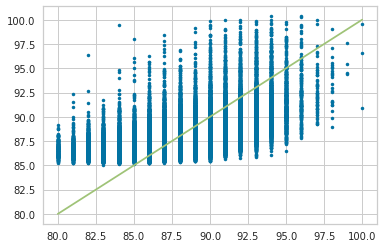

In [190]:
# plot prediction and actual data
y_pred = model1.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(80, 100, 100)
y = x
plt.plot(x, y)
plt.show()

In [191]:
### MODEL 2 - Same 2 features but with preprocessing.

target2 = dt['points'] 
data2 = dt[['price', 'age']].copy()

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.25, random_state=100)

#Scaling training data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
model2 = LinearRegression()
model2.fit(X_train, y_train)

#Scaling testing data
X_test = scaler.transform(X_test)


model2.score(X_test, y_test)

#X_train

0.3225649796735177

In [192]:
### MODEL 3 - Same features but taking log of prices

target3 = dt['points'] 
data3 = dt[['price', 'age']].copy()
data3['log_price'] = np.log(data3.price)

X_train, X_test, y_train, y_test = train_test_split(data3, target3, test_size=0.25, random_state=100)

#Scaling training data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model3 = LinearRegression()
model3.fit(X_train, y_train)
prediction = model3.predict(X_test)

#Scaling testing data
X_test = scaler.transform(X_test)
model3.score(X_test, y_test)


#X_train

0.3880318358548148

In [193]:
# MODEL 4 - introducing polynomial features

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preparing data
target4 = dt['points'] 
data4 = dt[['price', 'age']].copy()
data4['log_price'] = np.log(data4.price)
data4 = data4.drop(['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data4, target4, test_size=0.25, random_state=100)


for i in range(0,15,1):
    
    model4 = make_pipeline(PolynomialFeatures(i), StandardScaler(), LinearRegression())   
    
    # Fit our model to the training data
    model4.fit(X_train, y_train)
    model4.score(X_test, y_test)
    

    print("Degree = ", i ,"Score = " , model4.score(X_test, y_test))



Degree =  0 Score =  -1.3369843525623537e-06
Degree =  1 Score =  0.3876478067255834
Degree =  2 Score =  0.3898259366754543
Degree =  3 Score =  0.3911063672955255
Degree =  4 Score =  0.391592168834375
Degree =  5 Score =  0.3921620651877561
Degree =  6 Score =  0.3925009081364995
Degree =  7 Score =  0.39256728013173026
Degree =  8 Score =  0.3926264685190064
Degree =  9 Score =  0.39288355104454087
Degree =  10 Score =  0.3930328265829358
Degree =  11 Score =  0.3930563934601554
Degree =  12 Score =  0.3930601842759548
Degree =  13 Score =  0.39277956096486166
Degree =  14 Score =  0.392610331523738


In [195]:
## MODEL 5 - introducing dummy variables of appellation & country

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# Preparing data
target5 = dt['points'] 
data5 = dt[['price', 'age','appellation','country']].copy()
data5['log_price'] = np.log(data5.price)
data5 = data5.drop(['price'],axis=1)
dummy_a = pd.get_dummies(data5['appellation'])
dummy_c = pd.get_dummies(data5['country'])

data5 = pd.concat([data5, dummy_a], axis=1 )
data5 = pd.concat([data5, dummy_c], axis=1 )

data5 = data5.drop(['country'],axis=1)
data5 = data5.drop(['appellation'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data5, target5, test_size=0.7)


#for i in range(0,3,1):
    
model5 = make_pipeline(PolynomialFeatures(1),  LinearRegression())   #, StandardScaler(),LabelBinarizer()

# Fit our model to the training data
a = model5.fit(X_train, y_train)
b = model5.score(X_test, y_test)


print("Degree = Score = " , model5.score(X_test, y_test))



 #.steps[1][1].coef_

Degree = Score =  -4.19802065494361e+16


/Users/paskin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


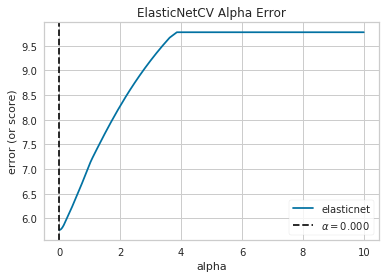

0.0037859622781265456
88.15085641670385
Model Score =  0.4059270278820334


In [197]:
## MODEL 6 - adding Lasso / Ridge to deal with features with low predicting power

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Preparing data WITH COUNTRIES AND APPELLATION
# target6 = dt['points'] 
# data6 = dt[['price', 'age','appellation','country']].copy()
# data6['log_price'] = np.log(data6.price)
# data6 = data6.drop(['price'],axis=1)
# dummy_a = pd.get_dummies(data6['appellation'])
# dummy_c = pd.get_dummies(data6['country'])

# data6 = pd.concat([data6, dummy_a], axis=1 )
# data6 = pd.concat([data6, dummy_c], axis=1 )

# data6 = data6.drop(['country'],axis=1)
# data6 = data6.drop(['appellation'],axis=1)

# #Preparing data WITHOUT COUNTRIES
# target6 = dt['points'] 
# data6 = dt[['price', 'age','appellation']].copy()
# data6['log_price'] = np.log(data6.price)
# data6 = data6.drop(['price'],axis=1)
# dummy_a = pd.get_dummies(data6['appellation'])
# data6 = pd.concat([data6, dummy_a], axis=1 )
# data6 = data6.drop(['appellation'],axis=1)


#Preparing data WITHOUT APPELLATIONs
target6 = dt['points'] 
data6 = dt[['price', 'age','country_agg']].copy()
data6['log_price'] = np.log(data6.price)
data6 = data6.drop(['price'],axis=1)
dummy_c = pd.get_dummies(data6['country_agg'])

data6 = pd.concat([data6, dummy_c], axis=1 )

data6 = data6.drop(['country_agg'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(data6, target6, test_size=0.25, random_state=100)

#Scaling training data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#Scaling testing data
X_test = scaler.transform(X_test)




# Create a list of alphas to cross-validate against
alphas_ = np.logspace(-10, 1, 400)

# Visualising alphas & error
model = ElasticNetCV(alphas=alphas_)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
g = visualizer.poof()



# Getting optimal alpha from ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, y_train)

print(regr.alpha_)
true_alpha = regr.alpha_
print(regr.intercept_) 


# Fitting model
model6 = make_pipeline(PolynomialFeatures(1),  linear_model.ElasticNet(alpha=true_alpha)) 

#Fit our model to the training data
a = model6.fit(X_train, y_train)
b = model6.score(X_test, y_test)
    

print("Model Score = " , model6.score(X_test, y_test))





In [198]:
intercept = model6.steps[1][1].intercept_ 
intercept

88.15085641670385

1. Standardize train
2. Run ElasticNetCV to findoptimal alpha np.logspace
3. Fit model and scoreon transformed test data


In [199]:
## Printing out features&coefficients from the final model

rsl = pd.DataFrame(list(zip(model6.steps[1][1].coef_, list(data6))))
rsl.columns = ['beta' , 'feature']

rsl['beta_abs'] = abs(rsl.beta)
rsl = rsl.sort_values(by='beta_abs', ascending=False)
rsl

,beta,feature,beta_abs
2,1.892870,Argentina,1.892870
1,-0.458386,log_price,0.458386
5,0.230886,Chile,0.230886
12,0.175240,South Africa,0.175240
8,0.128138,Italy,0.128138
14,-0.088784,US,0.088784
3,-0.083716,Australia,0.083716
4,0.077025,Austria,0.077025
11,-0.074111,Portugal,0.074111
6,-0.071321,France,0.071321
